In [71]:
import pandas as pd
import numpy as np

import json
from random import randint
from time import sleep

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import ast

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

from sklearn import cluster

In [72]:
spotify = pd.read_csv('spotify.csv')

In [73]:
spotify.drop_duplicates(inplace=True, ignore_index=True)

In [74]:
spotify

,song,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri.1,track_href,analysis_url,duration_ms,time_signature
0,Take Me To Church,['Hozier'],spotify:track:7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.634000,...,0.1160,0.437,128.945,audio_features,7dS5EaCoMnN7DzlpT6aRn2,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,https://api.spotify.com/v1/audio-analysis/7dS5...,241688,4
1,Cooler Than Me - Single Mix,"['Mike Posner', 'Gigamesh']",spotify:track:2V4bv1fNWfTcyRJKmej6Sj,0.768,0.820,7,-4.630,0,0.0474,0.179000,...,0.6890,0.625,129.965,audio_features,2V4bv1fNWfTcyRJKmej6Sj,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,https://api.spotify.com/v1/audio-analysis/2V4b...,213293,4
2,See You Again (feat. Kali Uchis),"['Tyler, The Creator', 'Kali Uchis']",spotify:track:7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.371000,...,0.1090,0.620,78.558,audio_features,7KA4W4McWYRpgf0fWsJZWB,spotify:track:7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,https://api.spotify.com/v1/audio-analysis/7KA4...,180387,4
3,Pompeii,['Bastille'],spotify:track:3gbBpTdY8lnQwqxNCcf795,0.679,0.715,9,-6.383,1,0.0407,0.075500,...,0.2710,0.571,127.435,audio_features,3gbBpTdY8lnQwqxNCcf795,spotify:track:3gbBpTdY8lnQwqxNCcf795,https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...,https://api.spotify.com/v1/audio-analysis/3gbB...,214148,4
4,Hips Don't Lie (feat. Wyclef Jean),"['Shakira', 'Wyclef Jean']",spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,0.778,0.824,10,-5.892,0,0.0707,0.284000,...,0.4050,0.758,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11744,Unsafe,"['Apashe', 'Phace']",spotify:track:3FY2AnmOs09L5S1b6E9JMt,0.647,0.940,7,-4.505,1,0.1530,0.000617,...,0.1140,0.166,172.071,audio_features,3FY2AnmOs09L5S1b6E9JMt,spotify:track:3FY2AnmOs09L5S1b6E9JMt,https://api.spotify.com/v1/tracks/3FY2AnmOs09L...,https://api.spotify.com/v1/audio-analysis/3FY2...,249500,4
11745,Puttin on the Ritz,"['Apashe', 'Ariane Zita']",spotify:track:6YBLGysCR4l3x4IJ3J0PbT,0.849,0.883,2,-4.464,1,0.1710,0.020400,...,0.1000,0.611,115.028,audio_features,6YBLGysCR4l3x4IJ3J0PbT,spotify:track:6YBLGysCR4l3x4IJ3J0PbT,https://api.spotify.com/v1/tracks/6YBLGysCR4l3...,https://api.spotify.com/v1/audio-analysis/6YBL...,251478,4
11746,Fire Inside - Funky VIP,"['Apashe', 'RIOT']",spotify:track:7KCa3tur8bgVQYu043eEZ5,0.732,0.945,1,-3.379,1,0.0331,0.000245,...,0.0940,0.557,125.982,audio_features,7KCa3tur8bgVQYu043eEZ5,spotify:track:7KCa3tur8bgVQYu043eEZ5,https://api.spotify.com/v1/tracks/7KCa3tur8bgV...,https://api.spotify.com/v1/audio-analysis/7KCa...,187619,4
11747,When The Lights Go Down (feat. Cody Simpson),"['DVBBS', 'Galantis', 'Cody Simpson']",spotify:track:3J3EdH1ZgXqk1ROTzQOF0U,0.738,0.713,1,-5.977,0,0.0444,0.099900,...,0.0542,0.490,126.077,audio_features,3J3EdH1ZgXqk1ROTzQOF0U,spotify:track:3J3EdH1ZgXqk1ROTzQOF0U,https://api.spotify.com/v1/tracks/3J3EdH1ZgXqk...,https://api.spotify.com/v1/audio-analysis/3J3E...,189266,4


In [75]:
top_lists = pd.read_csv('top_lists.csv')

In [76]:
top_lists.drop_duplicates(inplace=True, ignore_index=True)

In [77]:
top_lists

,song,artist
0,Keep On Loving You,REO Speedwagon
1,Don't Stand So Close to Me,The Police
2,Another Brick in the Wall,Pink Floyd
3,Love Stinks,The J. Geils Band
4,Funkytown,"Lipps, Inc"
...,...,...
4143,Starboy,The Weeknd
4144,4 Your Eyez Only,J. Cole
4145,Culture,Migos
4146,FUTURE,Future


# Lab | Unsupervised learning intro

#### Instructions 


It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this little project is to improve the recommendations of artists. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The experiments you did with the `Spotify` API and the Billboard web scraping will allow you to create a pipeline such that when the user enters a song, you:

1. Check whether or not the song is in the Billboard Hot 200.
2. Collect the audio features from the `Spotify` API.

After that, you want to send the `Spotify` audio features of the submitted song to the clustering model, which should return a cluster number.

We want to have as many songs as possible to create the clustering model, so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.

### Checking if the song is in the top lists:

In [78]:
def is_in_top(top_lists=top_lists):
    print('Please, write your song')
    name = input()

    songs = pd.Series(top_lists.song)

    flag = name in songs.unique()

    return flag, name

def top_reccomendation(name, top_lists=top_lists):
    l = len(top_lists)
    i = randint(0, l)
    while top_lists['song'][i] == name:
        i = randint(0, l)

    song = top_lists['song'][i]
    artist = top_lists['artist'][i]

    return song, artist
    

In [79]:
len(top_lists)

4148

In [80]:
is_in_top() #I use FUTURE as an example of true, Hola as an example of false

Please, write your song


(False, 'Hola')

In [81]:
top_reccomendation('FUTURE')

('Champagne Problems', 'Taylor Swift')

**MVP 1**

In [82]:
def recomend_v1(top_lists=top_lists):
    flag,name =  is_in_top(top_lists)

    if flag:
        song, artist = top_reccomendation(name)
        print('You can listen to ' + song + ' by ' + artist)
    else:
        print('Your song is not in the database')
        

In [83]:
recomend_v1()

Please, write your song
Your song is not in the database


### Clustering
I need to create clusters according to the audio features in the table `spotify`.  
I will create a table X including only the numerical features I will need:

In [84]:
X = spotify[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.566,0.664,4,-5.303,0,0.0464,0.634000,0.000000,0.1160,0.437,128.945,241688,4
1,0.768,0.820,7,-4.630,0,0.0474,0.179000,0.000000,0.6890,0.625,129.965,213293,4
2,0.558,0.559,6,-9.222,1,0.0959,0.371000,0.000007,0.1090,0.620,78.558,180387,4
3,0.679,0.715,9,-6.383,1,0.0407,0.075500,0.000000,0.2710,0.571,127.435,214148,4
4,0.778,0.824,10,-5.892,0,0.0707,0.284000,0.000000,0.4050,0.758,100.024,218093,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11744,0.647,0.940,7,-4.505,1,0.1530,0.000617,0.665000,0.1140,0.166,172.071,249500,4
11745,0.849,0.883,2,-4.464,1,0.1710,0.020400,0.008890,0.1000,0.611,115.028,251478,4
11746,0.732,0.945,1,-3.379,1,0.0331,0.000245,0.051800,0.0940,0.557,125.982,187619,4
11747,0.738,0.713,1,-5.977,0,0.0444,0.099900,0.000001,0.0542,0.490,126.077,189266,4


For a more accurate clustering, I need to transform the values into the same scale using the Standard scaler

In [85]:
X_prep = StandardScaler().fit_transform(X)

In [86]:
pd.DataFrame(X_prep,columns=X.columns)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.338990,-0.196012,-0.350945,0.337935,-1.109934,-0.519934,2.103646,-0.305925,-0.508227,-0.136615,0.184957,0.596573,0.132859
1,1.003465,0.670157,0.487740,0.585040,-1.109934,-0.508704,0.062404,-0.305925,3.389589,0.678852,0.220819,0.040238,0.132859
2,-0.392156,-0.779011,0.208178,-1.100999,0.900955,0.035931,0.923763,-0.305885,-0.555844,0.657164,-1.586576,-0.604479,0.132859
3,0.411988,0.087158,1.046863,-0.058607,0.900955,-0.583942,-0.401922,-0.305925,0.546156,0.444622,0.131868,0.056990,0.132859
4,1.069923,0.692366,1.326425,0.121673,-1.109934,-0.247055,0.533460,-0.305925,1.457687,1.255752,-0.831863,0.134283,0.132859
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11744,0.199322,1.336441,0.487740,0.630936,0.900955,0.677139,-0.737866,3.164553,-0.521832,-1.312103,1.701205,0.749631,0.132859
11745,1.541776,1.019956,-0.910069,0.645990,0.900955,0.879272,-0.649115,-0.259530,-0.617066,0.618126,-0.304344,0.788385,0.132859
11746,0.764216,1.364202,-1.189630,1.044368,0.900955,-0.669287,-0.739535,-0.035593,-0.657881,0.383896,0.080783,-0.462784,0.132859
11747,0.804091,0.076054,-1.189630,0.090464,-1.109934,-0.542393,-0.292458,-0.305919,-0.928620,0.093277,0.084123,-0.430515,0.132859


#### KMeans method

In [87]:
kmeans = KMeans(n_clusters=3, random_state=42)
# Training
kmeans.fit(X_prep)

# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    4686
1    1702
2    5361
dtype: int64

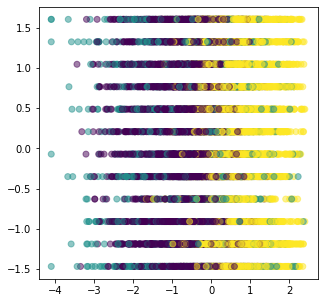

In [88]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 2], c=clusters,alpha=0.5)
plt.show()

In [89]:
kmeans.inertia_ 

125034.75895553039

With only 3 nodes, it is not evenly distributed. I need to estimate a good number of nodes.

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

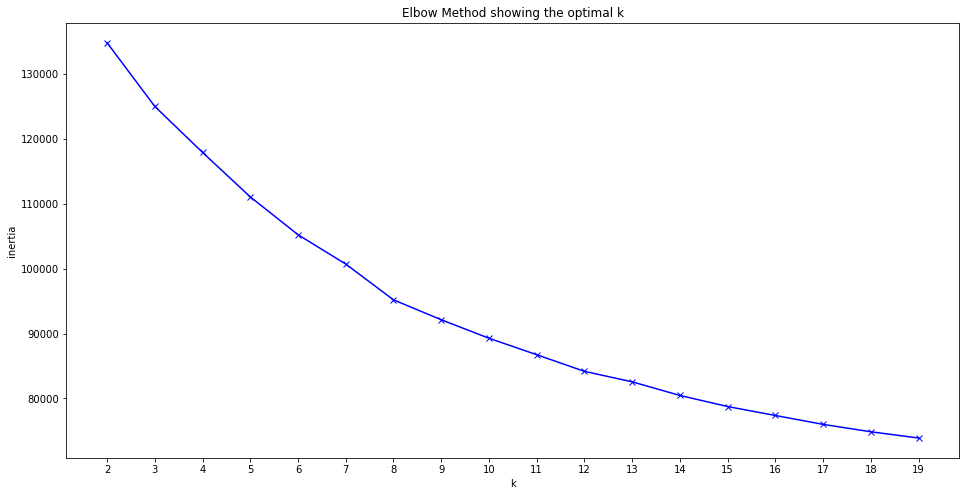

In [90]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=42)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)


%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

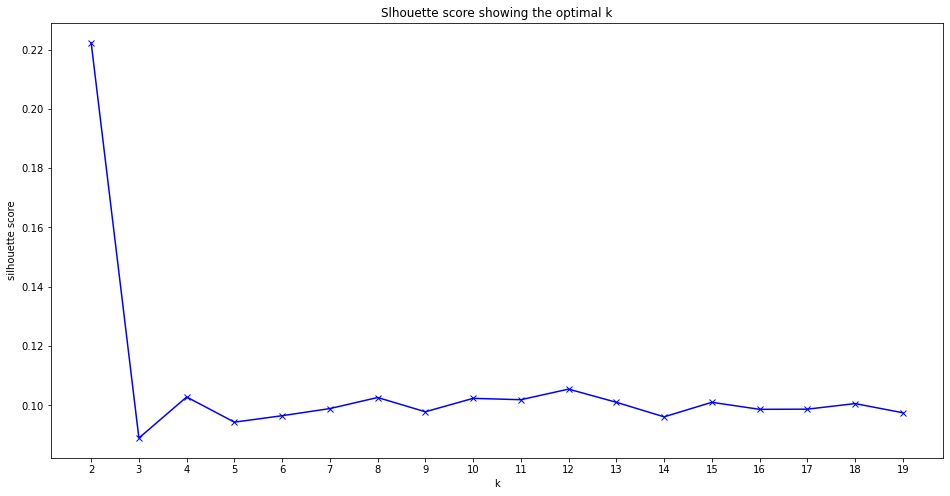

In [91]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=42)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

I will choose 8 nodes as my amount.

In [92]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_prep)
kmeans.inertia_

100725.54616858535

In [93]:
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    2037
1    1041
2    3059
3    1128
4    2883
5     968
6     633
dtype: int64

#### Agglomerative clustering

In [94]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.566,0.664,4,-5.303,0,0.0464,0.634000,0.000000,0.1160,0.437,128.945,241688,4
1,0.768,0.820,7,-4.630,0,0.0474,0.179000,0.000000,0.6890,0.625,129.965,213293,4
2,0.558,0.559,6,-9.222,1,0.0959,0.371000,0.000007,0.1090,0.620,78.558,180387,4
3,0.679,0.715,9,-6.383,1,0.0407,0.075500,0.000000,0.2710,0.571,127.435,214148,4
4,0.778,0.824,10,-5.892,0,0.0707,0.284000,0.000000,0.4050,0.758,100.024,218093,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11744,0.647,0.940,7,-4.505,1,0.1530,0.000617,0.665000,0.1140,0.166,172.071,249500,4
11745,0.849,0.883,2,-4.464,1,0.1710,0.020400,0.008890,0.1000,0.611,115.028,251478,4
11746,0.732,0.945,1,-3.379,1,0.0331,0.000245,0.051800,0.0940,0.557,125.982,187619,4
11747,0.738,0.713,1,-5.977,0,0.0444,0.099900,0.000001,0.0542,0.490,126.077,189266,4


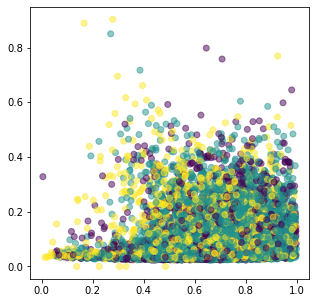

In [100]:
# ward linkage tends to produce relatively equally sized clusters
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
pred_ward = agglomerative.fit_predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X['energy'], X['speechiness'], c=pred_ward,alpha=0.5)
plt.show()

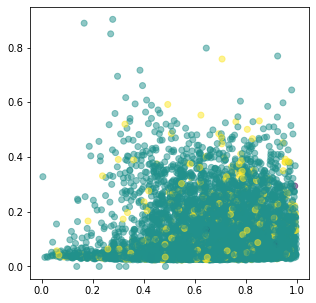

In [101]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='complete')
pred_complete = agglomerative.fit_predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X['energy'], X['speechiness'], c=pred_complete,alpha=0.5)
plt.show()

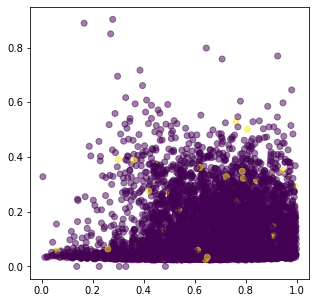

In [102]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='average')
pred_average = agglomerative.fit_predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X['energy'], X['speechiness'], c=pred_average,alpha=0.5)
plt.show()

In [99]:
type(kmeans)

sklearn.cluster._kmeans.KMeans

In [103]:
type(pred_ward)

numpy.ndarray

Saving

In [104]:
spotify.to_csv('spotify.csv', index=False)
top_lists.to_csv('spotify.csv', index=False)

In [105]:
import pickle

In [117]:
pickle.dump(kmeans, open('kmeans.p', 'wb'))
pickle.dump(pred_ward, open('pred_ward.p', 'wb'))
pickle.dump(pred_complete, open('pred_complete.p', 'wb'))
pickle.dump(pred_average, open('pred_average.p', 'wb'))

In [121]:
pickle.load(open("pred_average.p", "rb"))

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)